In [30]:
import networkx as nx
import community
import matplotlib.pyplot as plt

G = nx.karate_club_graph()  # load a default graph

partition = community.best_partition(G)  # compute communities

pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)


Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [60]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [108]:
supra_matrix_path = r"data\result_supra_matrix_2019.csv"
supra_matrix = np.genfromtxt(supra_matrix_path, delimiter=',', skip_header=1)
supra_matrix = supra_matrix[:, 1:]
df_community = pd.read_csv('data\multilayer_v_community_2019.csv')
df_community = df_community.sort_values(by=['layer_id', 'node_id'])
G = nx.Graph()
point_list = []

# 添加边及权重
for i in range(supra_matrix.shape[0]):
    i_count = 0
    for j in range(i + 1, supra_matrix.shape[1]):  # 避免重复添加
        if supra_matrix[i, j] > 0.1:  # 根据需要添加权重
            G.add_edge(i, j, weight=supra_matrix[i, j])
            i_count += 1

    if i_count > 0:
        point_list.append(i)
        
            

# 假设有 13 种不同的 module_id
module_ids = np.arange(1, 14)

# 创建一个与 df_community 模块 id 列对应的 700 多行 DataFrame
num_rows = len(df_community)

# 定义 13 种不同的颜色
colors = plt.cm.get_cmap('Paired', 13)  # 获取 13 种颜色
colors = [mcolors.to_hex(colors(i)) for i in range(13)]

# 创建一个颜色映射
color_mapping = {module_id: colors[i] for i, module_id in enumerate(module_ids)}

# 将颜色映射到 DataFrame
# df_community['color'] = df_community['module_id'].map(color_mapping)

C:\Users\a\AppData\Local\Temp\ipykernel_3804\3685463833.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', 13)  # 获取 13 种颜色


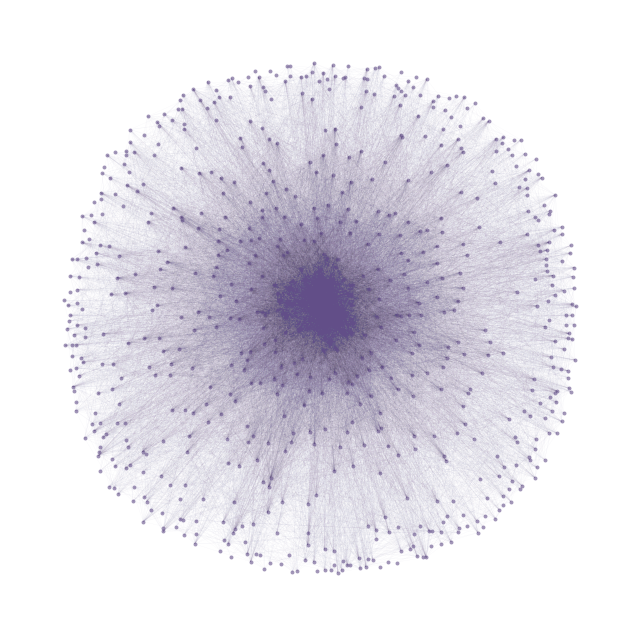

In [102]:
pos = nx.spring_layout(G, k=1.3)  # compute graph layout
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
plt.axis('off')


nx.draw_networkx_nodes(G, pos, node_size=8, cmap=plt.cm.RdYlBu, node_color="#624E88", alpha=0.6, linewidths=0)
nx.draw_networkx_edges(G, pos, width=0.2, edge_color='#624E88', alpha=0.05)
plt.show(G)